# Inference Demo for ImageNet Models

## Overview
This notebook can be used for inference on ONNX networks trained on **Imagenet** datasets. The demo shows how to use the trained models to do inference in MXNet. Please install the prerequisite packages if not already installed. 

## Model Support in This Demo

{list with links}

## Prerequisites
{list them (add min versions)}

* curl
* collections
* matplotlib
* numpy
* mxnet

what versions of python does this work with?

what version of mxnet is the min?

{what's this next requirement? - put it below... whatever it is...}
MXNet version required for GPU usage.
GPUs are recommended, but you should go ahead an talk about some broad benchmarks, like it should take x hours for y GPUs.

In [ ]:
# Install dependencies
!pip install mxnet-cu90mkl #tested on this version, can use other versions
!pip install numpy
!pip install matplotlib

In [2]:
#import required packages
import mxnet as mx
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
from mxnet.gluon.data.vision import transforms
from mxnet.contrib.onnx._import.import_model import import_model

## Test Images
A test image will be downloaded to test out inference. Feel free to provide your own image instead (must be jpeg?).

In [ ]:
!curl -O https://s3.amazonaws.com/model-server/inputs/kitten.jpg

Also make sure to have the labels/synset on which the network was trained. {Ok, where do you get these? Just include a curl command to fetch each of the required artifacts.}

We are using mxnet {always CamelCase} to do this inference and hence we will export {we are exporting here? why?} to MXnet {use proper CamelCase} as shown below.

{No instructions here? Why ## then #?}

In [ ]:
##Import from ONNX format to Mxnet syms and params
#model path is the path to the onnx file for the model being using for inference
model_path= 'vgg16.onnx'
sym, arg_params, aux_params = import_model(model_path)

{Why are you using vgg/ and not just vgg16?}

In [13]:
##Required to be done in case of syms and params present
## Bind symbols and params 
## synset file to be in the working directory
model_name = 'vgg/vgg16'
sym, arg_params, aux_params = mx.model.load_checkpoint(model_name, 0)

{Doesn't seem to very polished. 1 GPU will take forever... why no discussion about multi-gpu?
Why hardcoded datashape? Use a variable and discuss the resize step needed for all of the imagenet models.}

In [14]:
##Load the network for inference
ctx = mx.gpu(0)
mod = mx.mod.Module(symbol=sym, context=ctx, label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True, allow_extra=True)

In [15]:
## Read the imagenet labels on which network was trained
with open('synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

{Discuss normalize and resize. Tie this into the details that will be on the overview page for each model. Consider reordering how this is introduced since you already called a shape earlier without any context about how or why.
Break these functions out into different cells and have a markdown block introduce each and what it does.}

In [18]:
Batch = namedtuple('Batch', ['data']) #Why is Batch capitalized? This usually implies something.

def get_image(path, show=False):
    '''read and show the image taking the path as input
    '''
    img = mx.image.imread(path)
    if img is None:
        return None
    if show:
        plt.imshow(img.asnumpy())
        plt.axis('off')
    return img
   
def preprocess(img):   
    '''
    Preprocessing required on the images for inference
    '''
    
    transform_fn = transforms.Compose([
    transforms.Resize(224),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    img = transform_fn(img)
    img = img.expand_dims(axis=0) # batchify
    
    return img

def predict(path):
    '''
    Takes path of the input image and flag to display input image and prints 5 top predictions
    '''
    img = get_image(path, show=True)
    img = preprocess(img)
    mod.forward(Batch([img]))
    scores = mx.ndarray.softmax(mod.get_outputs()[0]).asnumpy()
    # print the top-5 inferences class
    scores = np.squeeze(scores)
    a = np.argsort(scores)[::-1]
    for i in a[0:5]:
        print('class=%s ; probability=%f' %(labels[i],scores[i]))

{your curl call didn't put the kitten into sqnet folder so this will fail.}

class=n02124075 Egyptian cat ; probability=0.320931
class=n02123045 tabby, tabby cat ; probability=0.295768
class=n02127052 lynx, catamount ; probability=0.212184
class=n02123159 tiger cat ; probability=0.135281
class=n02123394 Persian cat ; probability=0.014649


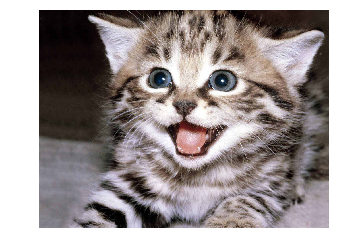

In [19]:
#img_path is the path of the inference image
img_path = 'sqnet/kitten.jpg'
predict(img_path)

{Now what?}